In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 불러오기
df = pd.read_csv('/content/alldata.csv')

# 필요한 열만 선택
selected_columns = [
    '국내산화니켈.수출금액', '국내산화니켈.수출중량', '국내산화니켈.수입금액', '국내산화니켈.수입중량',
    '국내산화리튬.수출금액', '국내산화리튬.수출중량', '국내산화리튬.수입금액', '국내산화리튬.수입중량',
    '국내산화코발트.수출금액', '국내산화코발트.수출중량', '국내산화코발트.수입금액', '국내산화코발트.수입중량',
    '국내이산화망간.수출금액', '국내이산화망간.수출중량', '국내이산화망간.수입금액', '국내이산화망간.수입중량',
    '국내탄산리튬.수출금액', '국내탄산리튬.수출중량', '국내탄산리튬.수입금액', '국내탄산리튬.수입중량',
    '국내황산니켈.수출금액', '국내황산니켈.수출중량', '국내황산니켈.수입금액', '국내황산니켈.수입중량',
    '국내황산코발트.수출금액', '국내황산코발트.수출중량', '국내황산코발트.수입금액', '국내황산코발트.수입중량',
    'UN.산화니켈.수입물량', 'UN.산화니켈.수입가격', 'UN.산화니켈.수출물량', 'UN.산화니켈.수출가격',
    'UN.산화리튬.수입물량', 'UN.산화리튬.수입가격', 'UN.산화리튬.수출물량', 'UN.산화리튬.수출가격',
    'UN.수산화코발트.수입물량', 'UN.수산화코발트.수입가격', 'UN.수산화코발트.수출물량', 'UN.수산화코발트.수출가격',
    'UN.이산화망간.수입물량', 'UN.이산화망간.수입가격', 'UN.이산화망간.수출물량', 'UN.이산화망간.수출가격',
    'UN.탄산리튬.수입물량', 'UN.탄산리튬.수입가격', 'UN.탄산리튬.수출물량', 'UN.탄산리튬.수출가격',
    'UN.황산니켈.수입물량', 'UN.황산니켈.수입가격', 'UN.황산니켈.수출물량', 'UN.황산니켈.수출가격',
    'UN.황산코발트.수입물량', 'UN.황산코발트.수입가격', 'UN.황산코발트.수출물량', 'UN.황산코발트.수출가격'
]

# 필요한 열만 선택하고 결측치 제거
df_selected = df[selected_columns].dropna()

# 독립 변수(X)와 종속 변수(y) 설정
X = df_selected.drop(columns=[
    '국내산화니켈.수입금액', '국내산화리튬.수입금액', '국내산화코발트.수입금액',
    '국내이산화망간.수입금액', '국내탄산리튬.수입금액', '국내황산니켈.수입금액',
    '국내황산코발트.수입금액'
])
y = df_selected[[
    '국내산화니켈.수입금액', '국내산화리튬.수입금액', '국내산화코발트.수입금액',
    '국내이산화망간.수입금액', '국내탄산리튬.수입금액', '국내황산니켈.수입금액',
    '국내황산코발트.수입금액'
]]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 다변량 회귀 모델 학습
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')
print(f'MSE: {mse}, R2: {r2}')


MSE: [1.63162084e+06 1.85806627e+08 6.39224091e+07 2.66861101e+05
 4.99503315e+08 6.78700179e+05 4.17693852e+06], R2: 0.9535266553086184


In [ ]:
# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib.font_manager 임포트
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

print("폰트 설정 완료")


Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
폰트 설정 완료


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


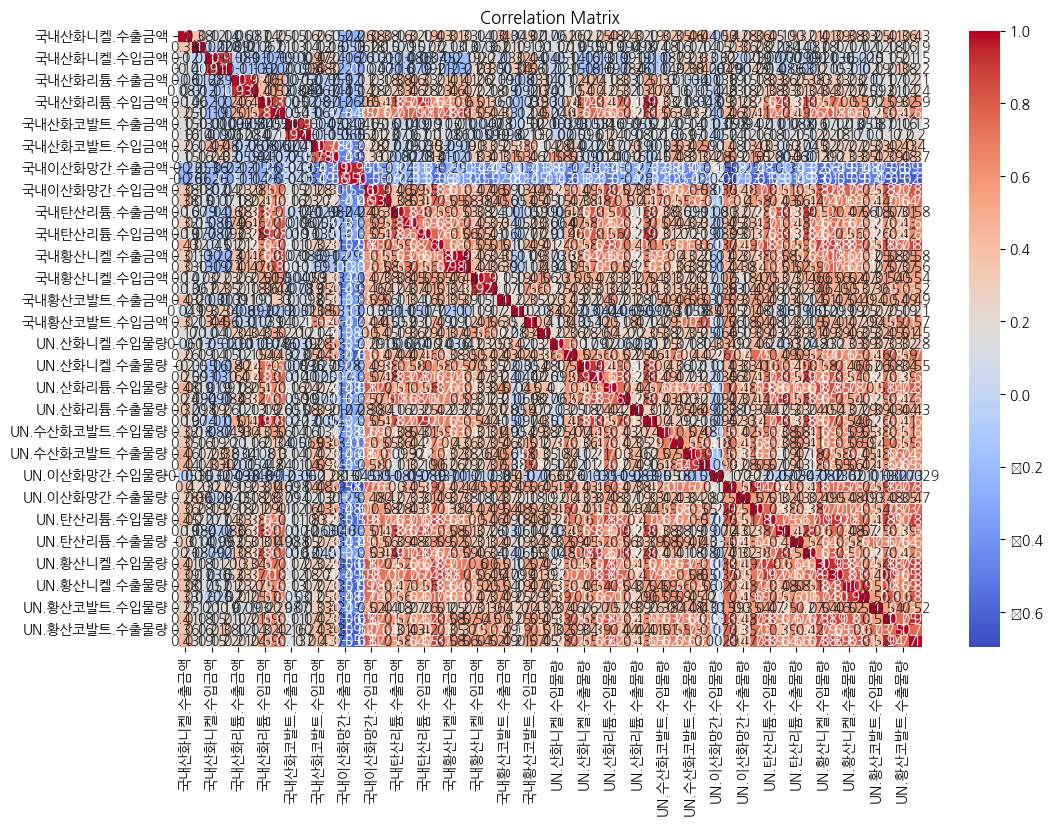

<ipython-input-4-3bc438c68700>:21: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


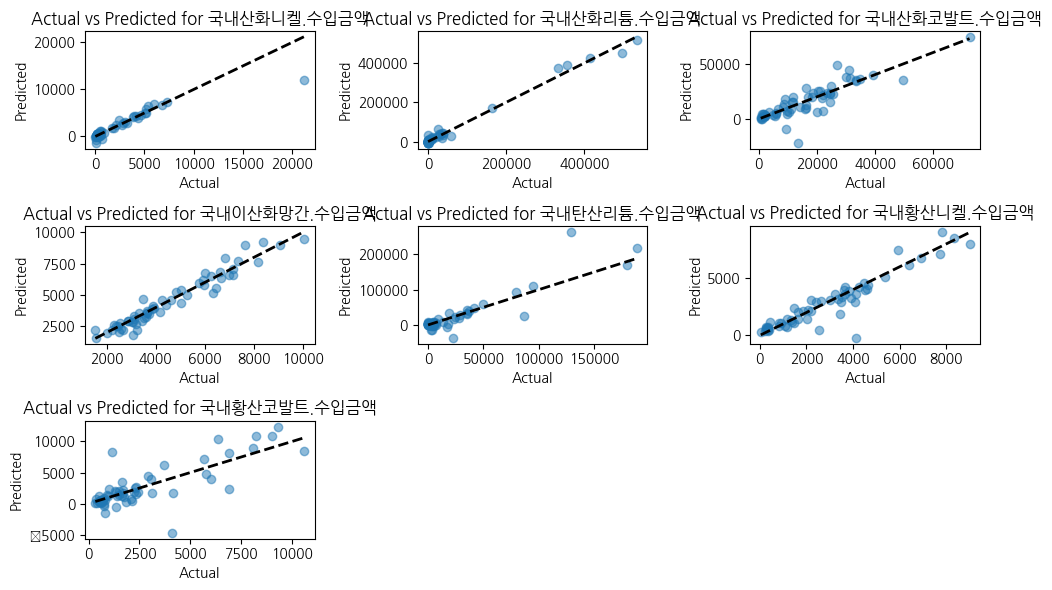

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 분석
correlation_matrix = df_selected.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 모델 예측값과 실제값 비교 시각화
plt.figure(figsize=(10, 6))
for i, col in enumerate(y.columns):
    plt.subplot(3, 3, i+1)
    plt.scatter(y_test[col], y_pred[:, i], alpha=0.5)
    plt.plot([y_test[col].min(), y_test[col].max()], [y_test[col].min(), y_test[col].max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {col}')
plt.tight_layout()
plt.show()


MSE: [1.63162084e+06 1.85806627e+08 6.39224091e+07 2.66861101e+05
 4.99503315e+08 6.78700179e+05 4.17693852e+06], R2: 0.9535266553086184
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-

<ipython-input-1-959d754115ec>:102: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


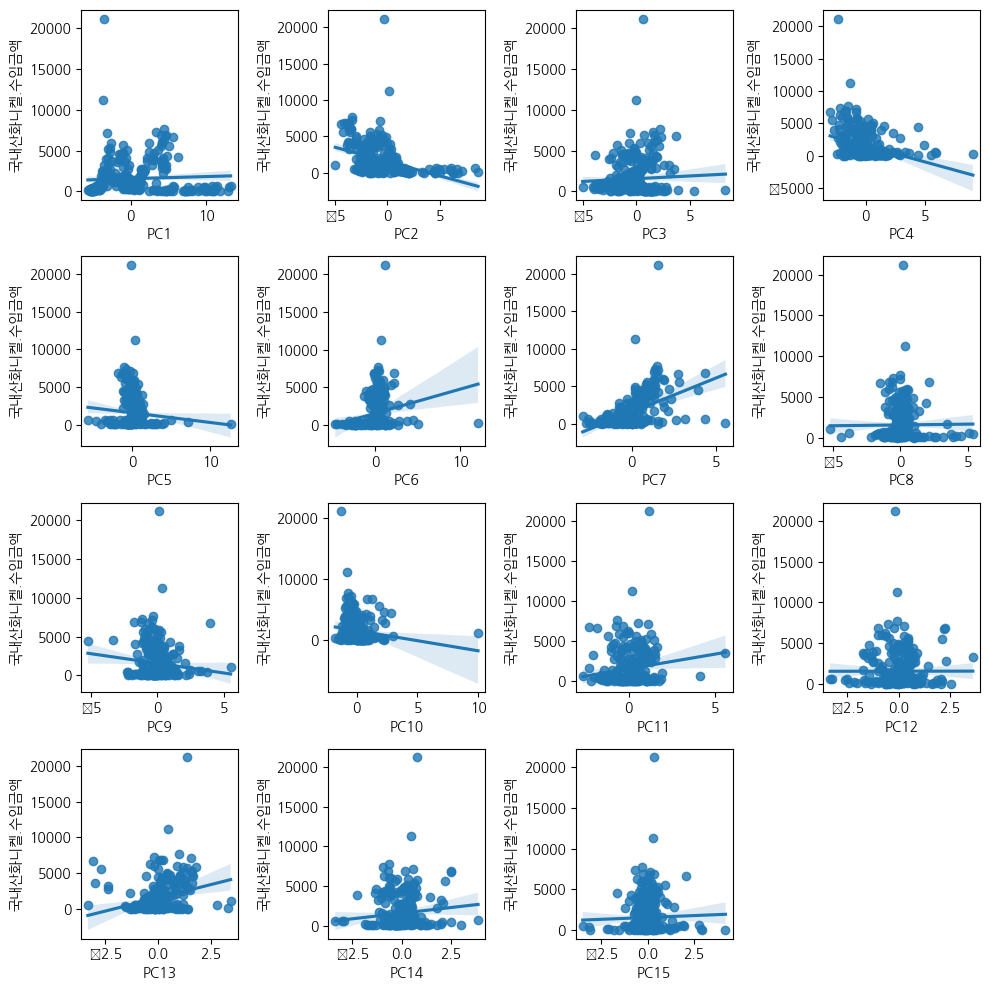

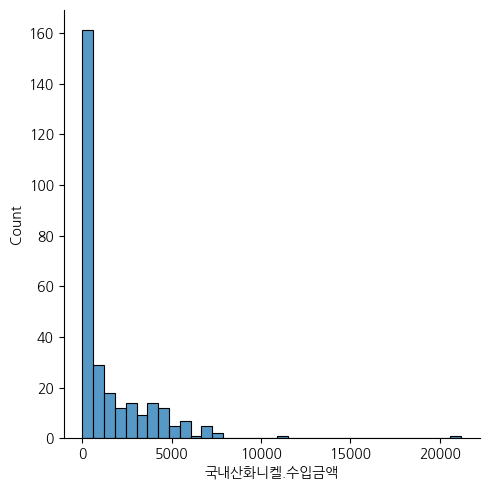

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


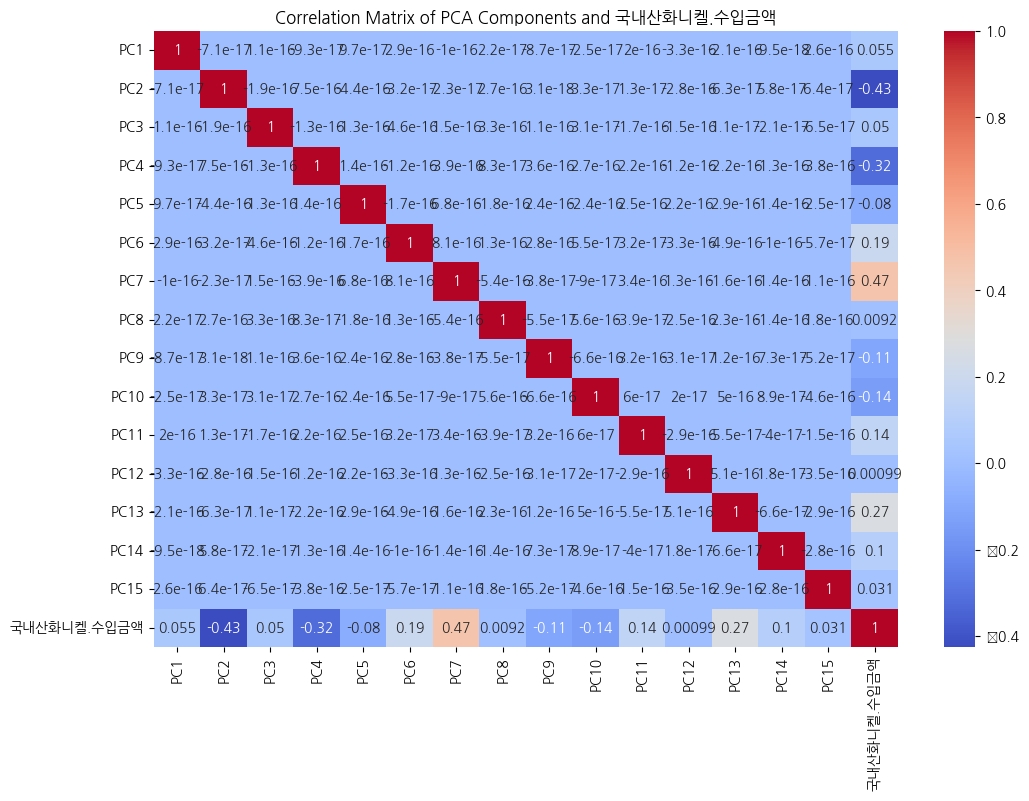

MSE (PCA): [3.96846083e+06 7.47982796e+08 5.88207020e+07 6.29722159e+05
 1.97349511e+08 1.25236745e+06 1.29380201e+06], R2 (PCA): 0.9378317303278392


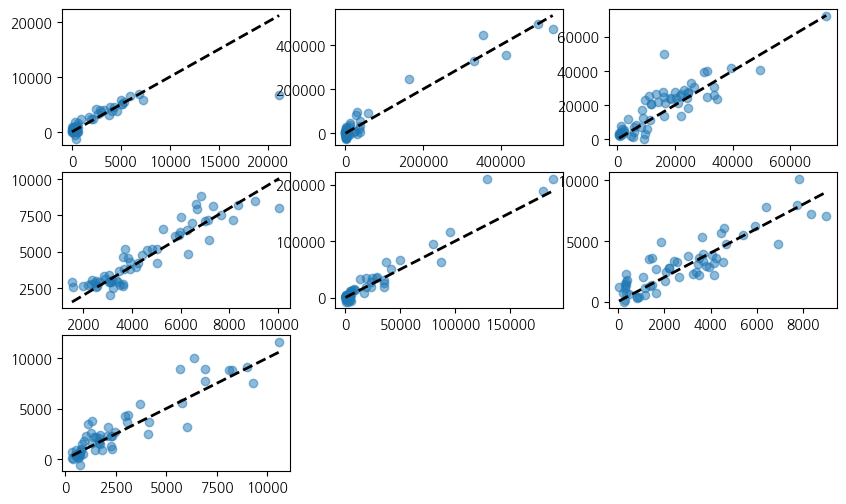

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 불러오기
df = pd.read_csv('/content/alldata.csv')

# 필요한 열만 선택
selected_columns = [
    '국내산화니켈.수출금액', '국내산화니켈.수출중량', '국내산화니켈.수입금액', '국내산화니켈.수입중량',
    '국내산화리튬.수출금액', '국내산화리튬.수출중량', '국내산화리튬.수입금액', '국내산화리튬.수입중량',
    '국내산화코발트.수출금액', '국내산화코발트.수출중량', '국내산화코발트.수입금액', '국내산화코발트.수입중량',
    '국내이산화망간.수출금액', '국내이산화망간.수출중량', '국내이산화망간.수입금액', '국내이산화망간.수입중량',
    '국내탄산리튬.수출금액', '국내탄산리튬.수출중량', '국내탄산리튬.수입금액', '국내탄산리튬.수입중량',
    '국내황산니켈.수출금액', '국내황산니켈.수출중량', '국내황산니켈.수입금액', '국내황산니켈.수입중량',
    '국내황산코발트.수출금액', '국내황산코발트.수출중량', '국내황산코발트.수입금액', '국내황산코발트.수입중량',
    'UN.산화니켈.수입물량', 'UN.산화니켈.수입가격', 'UN.산화니켈.수출물량', 'UN.산화니켈.수출가격',
    'UN.산화리튬.수입물량', 'UN.산화리튬.수입가격', 'UN.산화리튬.수출물량', 'UN.산화리튬.수출가격',
    'UN.수산화코발트.수입물량', 'UN.수산화코발트.수입가격', 'UN.수산화코발트.수출물량', 'UN.수산화코발트.수출가격',
    'UN.이산화망간.수입물량', 'UN.이산화망간.수입가격', 'UN.이산화망간.수출물량', 'UN.이산화망간.수출가격',
    'UN.탄산리튬.수입물량', 'UN.탄산리튬.수입가격', 'UN.탄산리튬.수출물량', 'UN.탄산리튬.수출가격',
    'UN.황산니켈.수입물량', 'UN.황산니켈.수입가격', 'UN.황산니켈.수출물량', 'UN.황산니켈.수출가격',
    'UN.황산코발트.수입물량', 'UN.황산코발트.수입가격', 'UN.황산코발트.수출물량', 'UN.황산코발트.수출가격'
]

# 필요한 열만 선택하고 결측치 제거
df_selected = df[selected_columns].dropna()

# 독립 변수(X)와 종속 변수(y) 설정
X = df_selected.drop(columns=[
    '국내산화니켈.수입금액', '국내산화리튬.수입금액', '국내산화코발트.수입금액',
    '국내이산화망간.수입금액', '국내탄산리튬.수입금액', '국내황산니켈.수입금액',
    '국내황산코발트.수입금액'
])
y = df_selected[[
    '국내산화니켈.수입금액', '국내산화리튬.수입금액', '국내산화코발트.수입금액',
    '국내이산화망간.수입금액', '국내탄산리튬.수입금액', '국내황산니켈.수입금액',
    '국내황산코발트.수입금액'
]]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다변량 회귀 모델 학습
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')
print(f'MSE: {mse}, R2: {r2}')

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib.font_manager 임포트
import matplotlib.font_manager as fm

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

print("폰트 설정 완료")

# PCA 변환
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_scaled)

# PCA 변환 후 데이터프레임 생성
pca_columns = [f'PC{i+1}' for i in range(15)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)
pca_df['국내산화니켈.수입금액'] = y['국내산화니켈.수입금액'].values

# 다변량 회귀 모델 학습 (PCA 데이터)
model_pca = MultiOutputRegressor(LinearRegression())
model_pca.fit(X_pca, y)

# PCA 변환 데이터에 대한 회귀 분석 플롯
plot_cols = ['국내산화니켈.수입금액'] + [f'PC{i+1}' for i in range(15)]
plot_df = pca_df[plot_cols]

plt.figure(figsize=(10, 10))
for idx, col in enumerate(plot_cols[1:]):
    axl = plt.subplot(4, 4, idx + 1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=axl)
plt.tight_layout()
plt.show()

# 종속 변수 히스토그램
sns.displot(x='국내산화니켈.수입금액', kind='hist', data=pca_df)
plt.show()

# 상관 분석
correlation_matrix = pca_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of PCA Components and 국내산화니켈.수입금액')
plt.show()

# 예측 (PCA 데이터)
X_test_pca = pca.transform(scaler.transform(X_test))
y_pred_pca = model_pca.predict(X_test_pca)

# 모델 평가 (PCA 데이터)
mse_pca = mean_squared_error(y_test, y_pred_pca, multioutput='raw_values')
r2_pca = r2_score(y_test, y_pred_pca, multioutput='variance_weighted')
print(f'MSE (PCA): {mse_pca}, R2 (PCA): {r2_pca}')

# 모델 예측값과 실제값 비교 시각화 (PCA 데이터)
plt.figure(figsize=(10, 6))
for i, col in enumerate(y.columns):
    plt.subplot(3, 3, i+1)
    plt.scatter(y_test[col], y_pred_pca[:, i], alpha=0.5)
    plt.plot([y_test[col].min(), y_test[col].max()], [y_test[col].min(), y_test[col].max()], 'k--', lw=2)
    plt.xlabel
